In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'25',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4f509ba1-0f0c-48ec-9c19-aa425e39f093',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)


dict

In [3]:
import pandas as pd


#This allows you to see all the coulumns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/Users/belal/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


id              name symbol                  slug  num_market_pairs  \
0       1           Bitcoin    BTC               bitcoin             10089   
1    1027          Ethereum    ETH              ethereum              6569   
2     825            Tether   USDT                tether             49154   
3    1839               BNB    BNB                   bnb              1211   
4    3408          USD Coin   USDC              usd-coin             10561   
5      52               XRP    XRP                   xrp               903   
6    2010           Cardano    ADA               cardano               672   
7    3890           Polygon  MATIC               polygon               608   
8      74          Dogecoin   DOGE              dogecoin               656   
9    4687       Binance USD   BUSD           binance-usd              6411   
10   5426            Solana    SOL                solana               439   
11   6636          Polkadot    DOT          polkadot-new               479   
12   4943               Dai    DAI  multi-collateral-dai              1967   
13   5994         Shiba Inu   SHIB             shiba-inu               493   
14   1958              TRON    TRX                  tron               736   
15      2          Litecoin    LTC              litecoin               887   
16   5805         Avalanche   AVAX             avalanche               386   
17   7083           Uniswap    UNI               uniswap               623   
18   3957      UNUS SED LEO    LEO          unus-sed-leo                24   
19   1975         Chainlink   LINK             chainlink               995   
20   3794            Cosmos   ATOM                cosmos               413   
21   3717   Wrapped Bitcoin   WBTC       wrapped-bitcoin               930   
22  11419           Toncoin    TON               toncoin                89   
23    328            Monero    XMR                monero               208   
24   1321  Ethereum Classic    ETC      ethereum-classic               381   

                  date_added  \
0   2013-04-28T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2019-04-28T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2019-09-20T00:00:00.000Z   
10  2020-04-10T00:00:00.000Z   
11  2020-08-19T00:00:00.000Z   
12  2019-11-22T00:00:00.000Z   
13  2020-08-01T00:00:00.000Z   
14  2017-09-13T00:00:00.000Z   
15  2013-04-28T00:00:00.000Z   
16  2020-07-13T00:00:00.000Z   
17  2020-09-17T00:00:00.000Z   
18  2019-05-21T00:00:00.000Z   
19  2017-09-20T00:00:00.000Z   
20  2019-03-14T00:00:00.000Z   
21  2019-01-30T00:00:00.000Z   
22  2021-08-26T13:40:22.000Z   
23  2014-05-21T00:00:00.000Z   
24  2016-07-24T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [platform, enterprise-solutions, zero-knowledg...  1.000000e+10   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [stablecoin, asset-backed-stablecoin, binance-...           NaN   
10  [pos, platform, solana-ecosystem, cms-holdings...           NaN   
11  [substrate, polkadot, binance-chain, polkadot-...           NaN   
12  [defi, stablecoin, asset-backed-stablecoin, et...           NaN   
13      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
14                  [media, payments, tron-ecosystem]           NaN   
15       

In [55]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4f509ba1-0f0c-48ec-9c19-aa425e39f093',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed succesfully')
    sleep(60) #sleep for 1 minute
exit()

In [71]:
df

id              name symbol                  slug  num_market_pairs  \
0       1           Bitcoin    BTC               bitcoin             10089   
1    1027          Ethereum    ETH              ethereum              6569   
2     825            Tether   USDT                tether             49154   
3    1839               BNB    BNB                   bnb              1211   
4    3408          USD Coin   USDC              usd-coin             10561   
5      52               XRP    XRP                   xrp               903   
6    2010           Cardano    ADA               cardano               672   
7    3890           Polygon  MATIC               polygon               608   
8      74          Dogecoin   DOGE              dogecoin               656   
9    4687       Binance USD   BUSD           binance-usd              6411   
10   5426            Solana    SOL                solana               439   
11   6636          Polkadot    DOT          polkadot-new               479   
12   4943               Dai    DAI  multi-collateral-dai              1967   
13   5994         Shiba Inu   SHIB             shiba-inu               493   
14   1958              TRON    TRX                  tron               736   
15      2          Litecoin    LTC              litecoin               887   
16   5805         Avalanche   AVAX             avalanche               386   
17   7083           Uniswap    UNI               uniswap               623   
18   3957      UNUS SED LEO    LEO          unus-sed-leo                24   
19   1975         Chainlink   LINK             chainlink               995   
20   3794            Cosmos   ATOM                cosmos               413   
21   3717   Wrapped Bitcoin   WBTC       wrapped-bitcoin               930   
22  11419           Toncoin    TON               toncoin                89   
23    328            Monero    XMR                monero               208   
24   1321  Ethereum Classic    ETC      ethereum-classic               381   

                  date_added  \
0   2013-04-28T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2018-10-08T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2017-10-01T00:00:00.000Z   
7   2019-04-28T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2019-09-20T00:00:00.000Z   
10  2020-04-10T00:00:00.000Z   
11  2020-08-19T00:00:00.000Z   
12  2019-11-22T00:00:00.000Z   
13  2020-08-01T00:00:00.000Z   
14  2017-09-13T00:00:00.000Z   
15  2013-04-28T00:00:00.000Z   
16  2020-07-13T00:00:00.000Z   
17  2020-09-17T00:00:00.000Z   
18  2019-05-21T00:00:00.000Z   
19  2017-09-20T00:00:00.000Z   
20  2019-03-14T00:00:00.000Z   
21  2019-01-30T00:00:00.000Z   
22  2021-08-26T13:40:22.000Z   
23  2014-05-21T00:00:00.000Z   
24  2016-07-24T00:00:00.000Z   

                                                 tags    max_supply  \
0   [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1   [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2   [payments, stablecoin, asset-backed-stablecoin...           NaN   
3   [marketplace, centralized-exchange, payments, ...           NaN   
4   [medium-of-exchange, stablecoin, asset-backed-...           NaN   
5   [medium-of-exchange, enterprise-solutions, arr...  1.000000e+11   
6   [dpos, pos, platform, research, smart-contract...  4.500000e+10   
7   [platform, enterprise-solutions, zero-knowledg...  1.000000e+10   
8   [mineable, pow, scrypt, medium-of-exchange, me...           NaN   
9   [stablecoin, asset-backed-stablecoin, binance-...           NaN   
10  [pos, platform, solana-ecosystem, cms-holdings...           NaN   
11  [substrate, polkadot, binance-chain, polkadot-...           NaN   
12  [defi, stablecoin, asset-backed-stablecoin, et...           NaN   
13      [memes, ethereum-ecosystem, doggone-doggerel]           NaN   
14                  [media, payments, tron-ecosystem]           NaN   
15       

In [57]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                          
Bitcoin                              1.297133                      2.514013   
Ethereum                             3.129507                      4.655280   
Tether                              -0.002016                      0.188049   
BNB                                  1.223025                      2.273151   
USD Coin                             0.691861                      2.662066   
XRP                                  1.820003                     -1.643733   
Cardano                              1.739670                      2.046504   
Polygon                              1.945845                      7.141696   
Dogecoin                             1.680573                      3.255758   
Binance USD                          0.074285                      0.579747   
Solana                               2.858965                      5.131522   
Polkadot                             2.489985                      4.087212   
Dai                                  0.807500                      1.061892   
Shiba Inu                            1.561691                      1.301559   
TRON                                 1.710818                      6.118361   
Litecoin                             2.054121                      1.723758   
Avalanche                            2.541248                      3.386027   
Uniswap                              1.987872                      3.428028   
UNUS SED LEO                         0.623413                      6.902134   
Chainlink                            1.745842                      3.134507   
Cosmos                               1.307462                      4.493117   
Wrapped Bitcoin                      1.430107                      2.342589   
Toncoin                              0.551631                      1.862913   
Monero                               0.699441                      4.464459   
Ethereum Classic                     1.999211                      2.662990   

                  quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                          
Bitcoin                             -7.131130                     -3.723573   
Ethereum                            -3.222997                     -0.144554   
Tether                               1.069473                      1.054898   
BNB                                 -3.609939                     -8.381450   
USD Coin                            -3.401584                     -3.402265   
XRP                                 -3.051050                     -5.418441   
Cardano                             -7.630961                    -13.065615   
Polygon                             -3.220681                    -12.464803   
Dogecoin                           -10.502010                    -16.996828   
Binance USD                          0.543605                      0.581170   
Solana                             -12.588176                    -10.448301   
Polkadot                            -7.248115                     -9.717633   
Dai                                 -3.205949                     -3.237008   
Shiba Inu                           -7.925835                    -16.002445   
TRON                               -10.134522                     -4.253824   
Litecoin                           -22.412705                    -23.429749   
Avalanche                           -9.596469                    -17.133192   
Uniswap                            -11.219035                    -11.324703   
UNUS SED LEO                         9.900285                      9.953064   
Chainlink                           -9.702194                     -9.570269   
Cosmos                              -7.246566                    -17.133561   
Wrapped Bitcoin                     -6.856840                     -

In [58]:
df4 = df3.stack()
df4

name                                          
Bitcoin           quote.USD.percent_change_1h      1.297133
                  quote.USD.percent_change_24h     2.514013
                  quote.USD.percent_change_7d     -7.131130
                  quote.USD.percent_change_30d    -3.723573
                  quote.USD.percent_change_60d    19.930901
                  quote.USD.percent_change_90d    22.575304
Ethereum          quote.USD.percent_change_1h      3.129507
                  quote.USD.percent_change_24h     4.655280
                  quote.USD.percent_change_7d     -3.222997
                  quote.USD.percent_change_30d    -0.144554
                  quote.USD.percent_change_60d    14.468879
                  quote.USD.percent_change_90d    21.351670
Tether            quote.USD.percent_change_1h     -0.002016
                  quote.USD.percent_change_24h     0.188049
                  quote.USD.percent_change_7d      1.069473
                  quote.USD.percent_change_30d     1.

In [59]:
type(df4)

pandas.core.series.Series

In [60]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin          quote.USD.percent_change_1h    1.297133
                 quote.USD.percent_change_24h   2.514013
                 quote.USD.percent_change_7d   -7.131130
                 quote.USD.percent_change_30d  -3.723573
                 quote.USD.percent_change_60d  19.930901
                 quote.USD.percent_change_90d  22.575304
Ethereum         quote.USD.percent_change_1h    3.129507
                 quote.USD.percent_change_24h   4.655280
                 quote.USD.percent_change_7d   -3.222997
                 quote.USD.percent_change_30d  -0.144554
                 quote.USD.percent_change_60d  14.468879
                 quote.USD.percent_change_90d  21.351670
Tether           quote.USD.percent_change_1h   -0.002016
                 quote.USD.percent_change_24h   0.188049
                 quote.USD.percent_change_7d    1.069473
                 quote.USD.percent_change_30d   1.054898
                 quote.USD.percent_change_60d   1.079027
                 quote.USD.percent_change_90d   1.064955
BNB              quote.USD.percent_change_1h    1.223025
                 quote.USD.percent_change_24h   2.273151
                 quote.USD.percent_change_7d   -3.609939
                 quote.USD.percent_change_30d  -8.381450
                 quote.USD.percent_change_60d   1.245897
                 quote.USD.percent_change_90d   1.601307
USD Coin         quote.USD.percent_change_1h    0.691861
                 quote.USD.percent_change_24h   2.662066
                 quote.USD.percent_change_7d   -3.401584
                 quote.USD.percent_change_30d  -3.402265
                 quote.USD.percent_change_60d  -3.393889
                 quote.USD.percent_change_90d  -3.399994
XRP              quote.USD.percent_change_1h    1.820003
                 quote.USD.percent_change_24h  -1.643733
                 quote.USD.percent_change_7d   -3.051050
                 quote.USD.percent_change_30d  -5.418441
                 quote.USD.percent_change_60d  -3.489572
                 quote.USD.percent_change_90d  -4.766836
Cardano          quote.USD.percent_change_1h    1.739670
                 quote.USD.percent_change_24h   2.046504
                 quote.USD.percent_change_7d   -7.630961
                 quote.USD.percent_change_30d -13.065615
                 quote.USD.percent_change_60d   0.809008
                 quote.USD.percent_change_90d   2.631723
Polygon          quote.USD.percent_change_1h    1.945845
                 quote.USD.percent_change_24h   7.141696
                 quote.USD.percent_change_7d   -3.220681
                 quote.USD.percent_change_30d -12.464803
                 quote.USD.percent_change_60d  29.461380
                 quote.USD.percent_change_90d  24.715196
Dogecoin         quote.USD.percent_change_1h    1.680573
                 quote.USD.percent_change_24h   3.255758
                 quote.USD.percent_change_7d  -10.502010
                 quote.USD.percent_change_30d -16.996828
                 quote.USD.percent_change_60d -10.626674
                 quote.USD.percent_change_90d -23.604069
Binance USD      quote.USD.percent_change_1h    0.074285
                 quote.USD.percent_change_24h   0.579747
                 quote.USD.percent_change_7d    0.543605
                 quote.USD.percent_change_30d   0.581170
                 quote.USD.percent_change_60d   0.572575
                 quote.USD.percent_change_90d   0.644079
Solana           quote.USD.percent_change_1h    2.858965
                 quote.USD.percent_change_24h   5.131522
                 quote.USD.percent_change_7d  -12.588176
                 quote.USD.percent_change_30d -10.448301
                 quote.USD.percent_change_60d  19.840821
                 quote.USD.percent_change_90d  41.346014
Polkadot         quote.USD.percent_change_1h    2.489985
                 quote.USD.percent_change_24h   4.087212
                 quote.USD.percent_change_7d   -7.248115
   

In [61]:
df5.count()

values    150
dtype: int64

In [62]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

name                       level_1     values
0             Bitcoin   quote.USD.percent_change_1h   1.297133
1             Bitcoin  quote.USD.percent_change_24h   2.514013
2             Bitcoin   quote.USD.percent_change_7d  -7.131130
3             Bitcoin  quote.USD.percent_change_30d  -3.723573
4             Bitcoin  quote.USD.percent_change_60d  19.930901
5             Bitcoin  quote.USD.percent_change_90d  22.575304
6            Ethereum   quote.USD.percent_change_1h   3.129507
7            Ethereum  quote.USD.percent_change_24h   4.655280
8            Ethereum   quote.USD.percent_change_7d  -3.222997
9            Ethereum  quote.USD.percent_change_30d  -0.144554
10           Ethereum  quote.USD.percent_change_60d  14.468879
11           Ethereum  quote.USD.percent_change_90d  21.351670
12             Tether   quote.USD.percent_change_1h  -0.002016
13             Tether  quote.USD.percent_change_24h   0.188049
14             Tether   quote.USD.percent_change_7d   1.069473
15             Tether  quote.USD.percent_change_30d   1.054898
16             Tether  quote.USD.percent_change_60d   1.079027
17             Tether  quote.USD.percent_change_90d   1.064955
18                BNB   quote.USD.percent_change_1h   1.223025
19                BNB  quote.USD.percent_change_24h   2.273151
20                BNB   quote.USD.percent_change_7d  -3.609939
21                BNB  quote.USD.percent_change_30d  -8.381450
22                BNB  quote.USD.percent_change_60d   1.245897
23                BNB  quote.USD.percent_change_90d   1.601307
24           USD Coin   quote.USD.percent_change_1h   0.691861
25           USD Coin  quote.USD.percent_change_24h   2.662066
26           USD Coin   quote.USD.percent_change_7d  -3.401584
27           USD Coin  quote.USD.percent_change_30d  -3.402265
28           USD Coin  quote.USD.percent_change_60d  -3.393889
29           USD Coin  quote.USD.percent_change_90d  -3.399994
30                XRP   quote.USD.percent_change_1h   1.820003
31                XRP  quote.USD.percent_change_24h  -1.643733
32                XRP   quote.USD.percent_change_7d  -3.051050
33                XRP  quote.USD.percent_change_30d  -5.418441
34                XRP  quote.USD.percent_change_60d  -3.489572
35                XRP  quote.USD.percent_change_90d  -4.766836
36            Cardano   quote.USD.percent_change_1h   1.739670
37            Cardano  quote.USD.percent_change_24h   2.046504
38            Cardano   quote.USD.percent_change_7d  -7.630961
39            Cardano  quote.USD.percent_change_30d -13.065615
40            Cardano  quote.USD.percent_change_60d   0.809008
41            Cardano  quote.USD.percent_change_90d   2.631723
42            Polygon   quote.USD.percent_change_1h   1.945845
43            Polygon  quote.USD.percent_change_24h   7.141696
44            Polygon   quote.USD.percent_change_7d  -3.220681
45            Polygon  quote.USD.percent_change_30d -12.464803
46            Polygon  quote.USD.percent_change_60d  29.461380
47            Polygon  quote.USD.percent_change_90d  24.715196
48           Dogecoin   quote.USD.percent_change_1h   1.680573
49           Dogecoin  quote.USD.percent_change_24h   3.255758
50           Dogecoin   quote.USD.percent_change_7d -10.502010
51           Dogecoin  quote.USD.percent_change_30d -16.996828
52           Dogecoin  quote.USD.percent_change_60d -10.626674
53           Dogecoin  quote.USD.percent_change_90d -23.604069
54        Binance USD   quote.USD.percent_change_1h   0.074285
55        Binance USD  quote.USD.percent_change_24h   0.579747
56        Binance USD   quote.USD.percent_change_7d   0.543605
57        Binance USD  quote.USD.percent_change_30d   0.581170
58        Binance USD  quote.USD.percent_change_60d   0.572575
59        Binance USD  quote.USD.percent_change_90d   0.644079
60             Solana   quote.USD.percent_change_1h   2.858965
61             Solana  quote.USD.percent_change_24h   5.131522
62             Solana   quote.USD.percent_change

In [80]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

name                percent_change     values
0             Bitcoin   quote.USD.percent_change_1h   1.297133
1             Bitcoin  quote.USD.percent_change_24h   2.514013
2             Bitcoin   quote.USD.percent_change_7d  -7.131130
3             Bitcoin  quote.USD.percent_change_30d  -3.723573
4             Bitcoin  quote.USD.percent_change_60d  19.930901
5             Bitcoin  quote.USD.percent_change_90d  22.575304
6            Ethereum   quote.USD.percent_change_1h   3.129507
7            Ethereum  quote.USD.percent_change_24h   4.655280
8            Ethereum   quote.USD.percent_change_7d  -3.222997
9            Ethereum  quote.USD.percent_change_30d  -0.144554
10           Ethereum  quote.USD.percent_change_60d  14.468879
11           Ethereum  quote.USD.percent_change_90d  21.351670
12             Tether   quote.USD.percent_change_1h  -0.002016
13             Tether  quote.USD.percent_change_24h   0.188049
14             Tether   quote.USD.percent_change_7d   1.069473
15             Tether  quote.USD.percent_change_30d   1.054898
16             Tether  quote.USD.percent_change_60d   1.079027
17             Tether  quote.USD.percent_change_90d   1.064955
18                BNB   quote.USD.percent_change_1h   1.223025
19                BNB  quote.USD.percent_change_24h   2.273151
20                BNB   quote.USD.percent_change_7d  -3.609939
21                BNB  quote.USD.percent_change_30d  -8.381450
22                BNB  quote.USD.percent_change_60d   1.245897
23                BNB  quote.USD.percent_change_90d   1.601307
24           USD Coin   quote.USD.percent_change_1h   0.691861
25           USD Coin  quote.USD.percent_change_24h   2.662066
26           USD Coin   quote.USD.percent_change_7d  -3.401584
27           USD Coin  quote.USD.percent_change_30d  -3.402265
28           USD Coin  quote.USD.percent_change_60d  -3.393889
29           USD Coin  quote.USD.percent_change_90d  -3.399994
30                XRP   quote.USD.percent_change_1h   1.820003
31                XRP  quote.USD.percent_change_24h  -1.643733
32                XRP   quote.USD.percent_change_7d  -3.051050
33                XRP  quote.USD.percent_change_30d  -5.418441
34                XRP  quote.USD.percent_change_60d  -3.489572
35                XRP  quote.USD.percent_change_90d  -4.766836
36            Cardano   quote.USD.percent_change_1h   1.739670
37            Cardano  quote.USD.percent_change_24h   2.046504
38            Cardano   quote.USD.percent_change_7d  -7.630961
39            Cardano  quote.USD.percent_change_30d -13.065615
40            Cardano  quote.USD.percent_change_60d   0.809008
41            Cardano  quote.USD.percent_change_90d   2.631723
42            Polygon   quote.USD.percent_change_1h   1.945845
43            Polygon  quote.USD.percent_change_24h   7.141696
44            Polygon   quote.USD.percent_change_7d  -3.220681
45            Polygon  quote.USD.percent_change_30d -12.464803
46            Polygon  quote.USD.percent_change_60d  29.461380
47            Polygon  quote.USD.percent_change_90d  24.715196
48           Dogecoin   quote.USD.percent_change_1h   1.680573
49           Dogecoin  quote.USD.percent_change_24h   3.255758
50           Dogecoin   quote.USD.percent_change_7d -10.502010
51           Dogecoin  quote.USD.percent_change_30d -16.996828
52           Dogecoin  quote.USD.percent_change_60d -10.626674
53           Dogecoin  quote.USD.percent_change_90d -23.604069
54        Binance USD   quote.USD.percent_change_1h   0.074285
55        Binance USD  quote.USD.percent_change_24h   0.579747
56        Binance USD   quote.USD.percent_change_7d   0.543605
57        Binance USD  quote.USD.percent_change_30d   0.581170
58        Binance USD  quote.USD.percent_change_60d   0.572575
59        Binance USD  quote.USD.percent_change_90d   0.644079
60             Solana   quote.USD.percent_change_1h   2.858965
61             Solana  quote.USD.percent_change_24h   5.131522
62             Solana   quote.USD.percent_change

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
type(df7)

pandas.core.frame.DataFrame

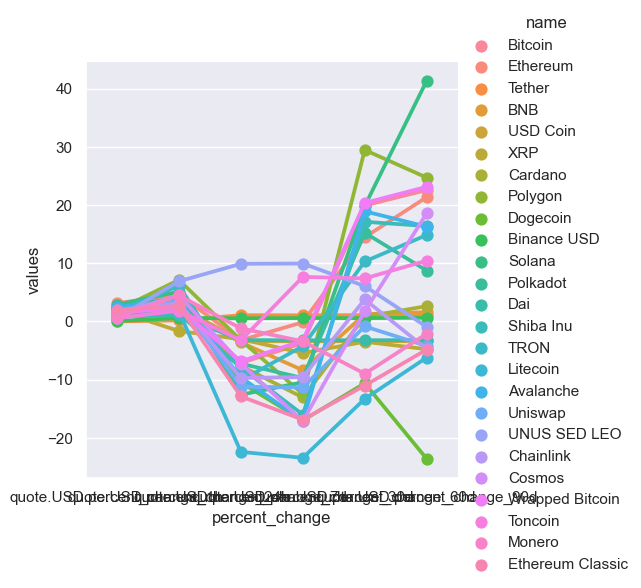

In [81]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')